# 2HDM-I

## Higgs couplings with fermions
In the context of 2HDM-I, the couplings $g_{htt}$, $g_{hbb}$, $g_{h\tau\tau}$ can be extracted of:

$$g_{hff} = \frac{g}{2}\frac{m_{f}}{m_{W}}\frac{\cos{\alpha}}{\sin{\beta}}$$

where $f$ represents fermions, $m_f$ and $m_W$ are the masses of $f$ and $W$ respectively, $\alpha$ and $\beta$ are the mixing angles of 2HDM-I and finally $g$ is the $SU(2)$ coupling constant. In the case of $W$ and $Z$ Higgs couplings we have the next expressions:

$$g_{hVV} = g_V m_{V}\sin{(\beta-\alpha)}$$
where $m_V$ with $V = Z, W$. If we consider $C_{\alpha \beta} = \cos{(\beta-\alpha)}$

$$\alpha = \arctan{(\tan{(\beta)})}- \arccos{(C_{\alpha \beta})}$$
$$\sin{(\beta)} = \tan{(\beta)}\cos{(\arctan{(\tan{(\beta)})})}$$
then, $g_{hff}$ and $g_{hVV}$ are rewritten in term of $t_{\beta} = \tan{(\beta)}$ and $C_{\alpha \beta}$.

In python these couplings can be defined as functions $\alpha$, $\tan{\beta}$ and $C_{\alpha \beta} = \cos{(\alpha - \beta)}$. 

In [2]:
from sympy import * #import sympy
init_printing()
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from spacemathpy import *

### Python definition of $g_{hff}$

Using all the sympy functions we can define

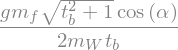

In [3]:
mf,a,tb,cab = symbols(r'm_f,\alpha,t_b,{{C_{\alpha\beta}}}',real=True)
s = 'symbol'
ghff =(g[s]/2)*(mf/mW[s])*(cos(a)/(tb*cos(atan(tb))))

ghff

### Python definition of $t$, $b$ and $\tau$ Higgs couplings

We can use sympy symbols to define our Higgs couplings and we will have beautiful latex outputs. After we can use the function lambdify of sympy to convert this symbolic coupling to numeric functions that allow numpy arrays in its arguments 

#### Symbolic definition

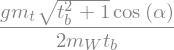

In [4]:
ghtt = ghff.subs(mf,mt[s])
ghtt

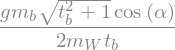

In [5]:
ghbb = ghff.subs(mf,mb[s])
ghbb

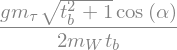

In [6]:
ghtautau = ghff.subs(mf,mtau[s])
ghtautau

#### Numeric definition

We can use the numeric_substitutions function to evaluate all constants

In [7]:
num = numeric_substitutions('All')
num

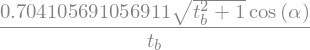

In [8]:
ghtt.subs(num)

Then use lambdify function as follow to implement numeric functions

In [9]:
ghtt_2hdmI = lambdify([a,tb],ghtt.subs(num),'numpy')
ghtt_2hdmI(0.1,0.2)

In [10]:
ghbb_2hdmI = lambdify([a,tb],ghbb.subs(num),'numpy')
ghbb_2hdmI(0.1,0.2)

In [11]:
ghtautau_2hdmI = lambdify([a,tb],ghtautau.subs(num),'numpy')
ghtautau_2hdmI(0.1,0.2)

### Python definition of $W$ and $Z$ Higgs couplings

#### Symbolic definition

In [12]:
sab = symbols(r'{{S_{\alpha\beta}}}',real=True)
ghWW = gw[s]*mW[s]*sab
ghWW

In [13]:
ghZZ = gz[s]*mZ[s]*sab
ghZZ

#### Numeric definition

In [14]:
ghww_2hdmI = lambdify([sab],ghWW.subs(num),'numpy')
ghww_2hdmI(0.1)

In [15]:
ghzz_2hdmI = lambdify([sab],ghZZ.subs(num),'numpy')
ghzz_2hdmI(0.1)

## Initial parameter space

In [58]:
n = 2_00_000
cabnp = np.random.uniform(-1.0,1.0,n)
tbnp = np.random.uniform(0.01,5.0,n)
parameters = {'Cab':cabnp,'tb':tbnp}

In [59]:
THDMI = HiggsSignalStrength()
THDMI.model = '2HDM-I'
THDMI.ghtt = ghtt_2hdmI(-np.arccos(cabnp) + np.arctan(tbnp),tbnp)
THDMI.ghbb = mb['value']/SMvev['value']
THDMI.ghtautau = ghtautau_2hdmI(-np.arccos(cabnp) + np.arctan(tbnp),
                               tbnp)
THDMI.ghWW = ghww_2hdmI(np.sqrt(1-cabnp**2))
THDMI.ghZZ = ghzz_2hdmI(np.sqrt(1-cabnp**2))
THDMI.gCH = 0.5
THDMI.mCH = np.random.uniform(100,1000,n)

In [60]:
THDMI

2HDM-I couplings
            ghtt      ghbb  ghtautau       ghWW       ghZZ  gCH         mCH
0       0.181760  0.016992  0.001865   2.317720   2.982959  0.5  318.272204
1       0.679679  0.016992  0.006972  51.296906  66.020307  0.5  812.493763
2       0.645198  0.016992  0.006619  49.920890  64.249344  0.5  884.681257
3       0.675442  0.016992  0.006929  39.875459  51.320640  0.5  477.260323
4       1.821438  0.016992  0.018685  44.304369  57.020750  0.5  876.699582
...          ...       ...       ...        ...        ...  ...         ...
199995  0.736344  0.016992  0.007554  48.210489  62.048017  0.5  784.396035
199996  0.368369  0.016992  0.003779  43.934829  56.545144  0.5  449.020361
199997  0.689427  0.016992  0.007072  30.644668  39.440398  0.5  434.151926
199998  0.766845  0.016992  0.007867  45.044447  57.973248  0.5  101.695636
199999  0.602085  0.016992  0.006176  34.517465  44.424778  0.5  767.207275

[200000 rows x 7 columns]

In [61]:
THDMIspace1 = THDMI.parameter_space(parameters,sigma=1)
THDMIspace2 = THDMI.parameter_space(parameters,sigma=2)

## Allowed parameter space

We calculate the allowed parameter space to each signal

### $$R_{\tau}$$

In [53]:
THDMIspace1.keys()

dict_keys(['Rtau', 'Rb', 'Rgamma', 'Rw', 'Rz', 'Intersection'])

In [54]:
THDMIspace1['Rb']['Cab']

0        -0.059995
1        -0.290890
2        -0.174259
3         0.009134
4        -0.066270
            ...   
699032    0.313347
699033    0.281055
699034    0.255636
699035   -0.144972
699036    0.044485
Name: Cab, Length: 699037, dtype: float64

In [55]:
latex_names = {'Cab':r'$\cos(\beta -\alpha)$','tb':r'$\tan(\beta)$'}

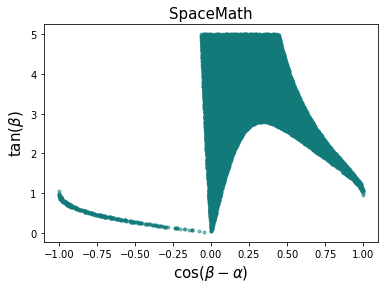

In [62]:
plot_df(THDMIspace1['Rtau'],
        colx='Cab',
        coly='tb',
        latex_names=latex_names
       )

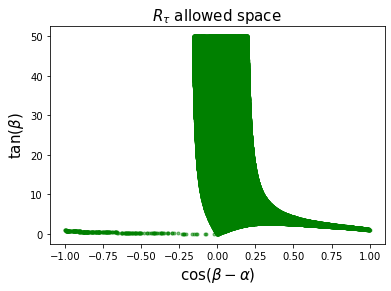

In [23]:
plot_df(THDMIspace1['Rtau'],
        colx='Cab',
        coly='tb',
        latex_names=latex_names,
        color='green',
        alpha=0.5,
        title=r'$R_{\tau}$ allowed space',
        fname='rtau_space.pdf'
       )

### $$R_{b}$$

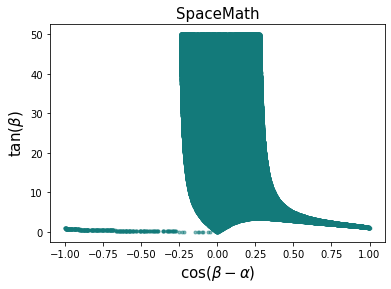

In [152]:
plot_df(THDMIspace1['Rb'],colx='Cab',coly='tb',latex_names=latex_names)

### $$R_{\gamma}$$

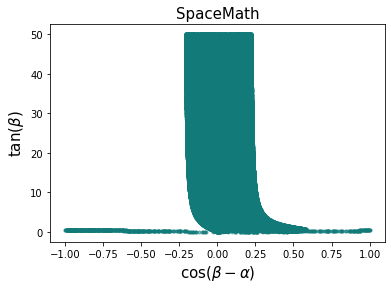

In [153]:
plot_df(THDMIspace2['Rgamma'],colx='Cab',coly='tb',latex_names=latex_names)

In [154]:
Rgamma.func(ghtt_2hdmI(0.1,0.2),
            ghbb_2hdmI(0.1,0.2),ghww_2hdmI(0.1),
            0,500)

### $$R_{W}$$

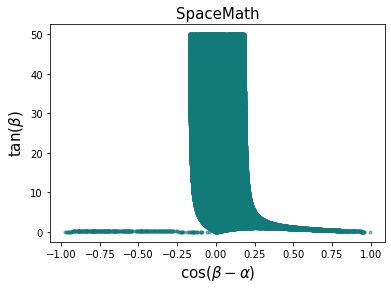

In [155]:
plot_df(THDMIspace1['Rw'],colx='Cab',coly='tb',
        latex_names=latex_names)

### $$R_{Z}$$

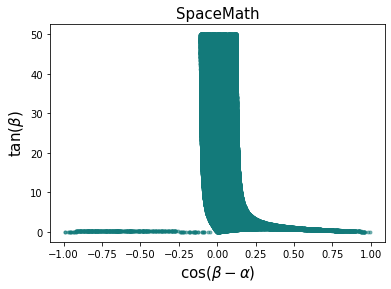

In [156]:
plot_df(THDMIspace2['Rz'],colx='Cab',coly='tb',
        latex_names=latex_names)

## Intersection

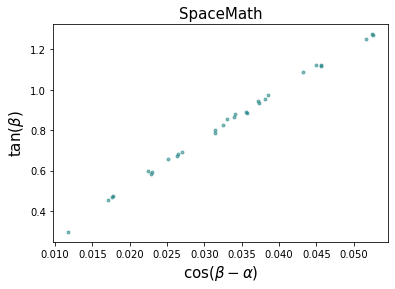

In [157]:
plot_df(THDMIspace1['Intersection'],colx='Cab',coly='tb',
        latex_names=latex_names)

## All Rxs
Using directly matplotlib

In [63]:
signals = ['Rtau','Rb','Rgamma','Rw','Rz','Intersection']
signalsV = ['Rgamma','Rw','Rz']
def multiplot(*R):
    data2s = {signal:THDMIspace1[signal] for signal in R}
    plt.figure(figsize=(10,8))
    for k in data2s.keys():
        plt.plot(data2s[k]['Cab'],data2s[k]['tb'],'.',label=k,alpha=0.5)
    plt.xlabel(r'$\cos(\beta-\alpha)$');
    plt.ylabel(r'$\tan(\beta)$');
    plt.title(r'Plane  $\tan(\beta)$ vs $\cos(\beta -\alpha)$ to 1$\sigma$')
    plt.legend();

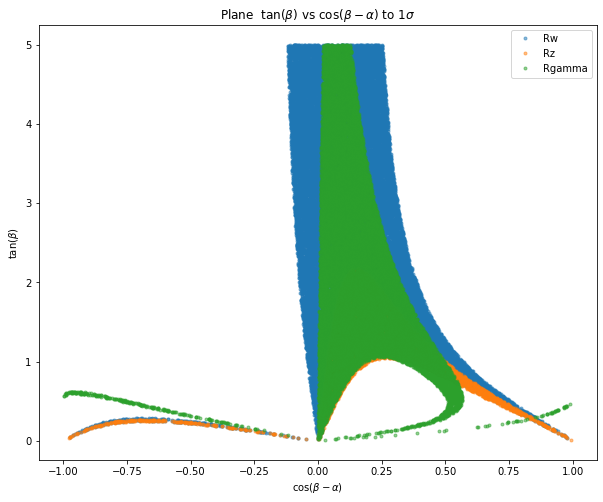

In [64]:
multiplot('Rw','Rz','Rgamma')

In [31]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

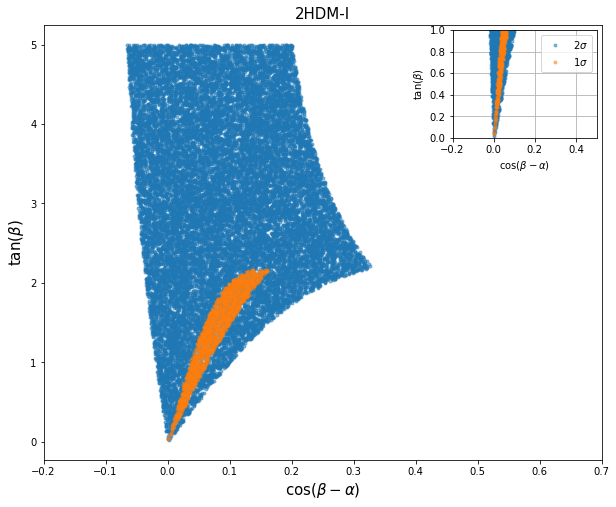

In [65]:
sigmaspace = {r'2$\sigma$':THDMIspace2,r'1$\sigma$':THDMIspace1}

fig, ax = plt.subplots(1, 1, figsize=[10, 8])
for sigma in sigmaspace.keys():
    ax.plot(sigmaspace[sigma]['Intersection']['Cab'],
        sigmaspace[sigma]['Intersection']['tb'],'.',
             label=sigma,alpha=0.5)
ax.set_xlim(xmax=0.7,xmin=-0.2)
#ax.grid()
ax.set_xlabel(r'$\cos(\beta -\alpha)$',fontsize=15);
ax.set_ylabel(r'$\tan(\beta)$',fontsize=15);
ax.set_title(r'2HDM-I',fontsize=15)
ax.legend();


# Create inset of width 2 inches and height 1.5 inches
# at the default upper right location
axins = inset_axes(ax, width=2, height=1.5)
for sigma in sigmaspace.keys():
    axins.plot(sigmaspace[sigma]['Intersection']['Cab'],
        sigmaspace[sigma]['Intersection']['tb'],'.',
             label=sigma,alpha=0.5)
axins.set_ylim(ymax=1,ymin=0)
axins.set_xlim(xmax=0.5,xmin=-0.2)
axins.grid()
axins.set_xlabel(r'$\cos(\beta -\alpha)$');
axins.set_ylabel(r'$\tan(\beta)$');
axins.legend();
#path = ''
#plt.savefig(path + 'name.pdf')
#plt.show()